<a href="https://colab.research.google.com/github/daichi-a/PythonDataAnalyzeClassMaterial/blob/master/FactorAnalysis_NihonSeaPacificSea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://cad.lolipop.jp/data/data_analyze_python/tohoku-huge-data.csv

を読み込む

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tohoku-huge-data.csv to tohoku-huge-data.csv


In [3]:
# CSVを整えてDataFrameにする
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('tohoku-huge-data.csv', encoding='SHIFT-JIS', header=1)

# 抜き出す
for a_column in ['秋田', '宮古', '酒田', '石巻']:
  # それぞれ
  # 降水量の合計(mm),降水量の合計(mm),降水量の合計(mm),降水量の合計(mm),日照時間(時間),日照時間(時間),日照時間(時間),日照時間(時間),平均風速(m/s),平均風速(m/s),平均風速(m/s),平均湿度(％),平均湿度(％),平均湿度(％),平均雲量(10分比),平均雲量(10分比),平均雲量(10分比)
  # で並んでいて，一つの地点につき，
  # (空),現象なし情報,品質情報,均質番号,(空),現象なし情報,品質情報,均質番号,(空),品質情報,均質番号,(空),品質情報,均質番号,(空),品質情報,均質番号
  # の順に並んでいる
  # の(空)以外の場所が余計なので，削除
  for i in range(1, 17, 1):
    # 落とす列の列番号を指定(0~)
    if i in [1, 2, 3, 5, 6, 7, 9, 10, 12, 13, 15, 16]:
      df = df.drop(a_column + '.' + str(i), axis=1)

df = df.drop(1)

# DataFrameの中に欠損値がある場合は，0.0を代わりに入れておく
df = df.fillna(0)
df.head()

,Unnamed: 0,秋田,秋田.4,秋田.8,秋田.11,秋田.14,宮古,宮古.4,宮古.8,宮古.11,宮古.14,酒田,酒田.4,酒田.8,酒田.11,酒田.14,石巻,石巻.4,石巻.8,石巻.11,石巻.14
0,年月,降水量の合計(mm),日照時間(時間),平均風速(m/s),平均湿度(％),平均雲量(10分比),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均湿度(％),平均雲量(10分比),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均湿度(％),平均雲量(10分比),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均湿度(％),平均雲量(10分比)
2,1977/1,51.0,72.6,4.4,74,9.5,6.0,224.3,2.1,57,3.5,101.0,68.9,4.7,70,9.5,3.0,203.0,2.3,68,4.2
3,1978/1,93.5,74.0,5.0,75,9.3,33.0,173.4,1.8,61,4.9,163.5,55.8,5.2,70,9.3,9.5,156.0,2.8,72,5.2
4,1979/1,113.5,70.7,3.1,72,8.5,74.0,164.0,1.7,57,4.6,201.0,63.1,4.8,72,8.7,32.5,177.5,2.8,68,4.7
5,1980/1,172.5,66.4,3.7,75,9.5,55.0,172.4,1.8,57,5.1,212.0,51.1,4.9,74,9.2,17.0,179.0,2.9,71,5.5


In [4]:
# グラフ表示するためにローマ字ラベルを作っておく
#np.arrayはenumerateでは回せないので，　listのままにしておく
city_label_list = (['Akita', 'Miyako', 'Sakata', 'Ishinomaki'])

# その要素の有無で0と1の2値で表現される変数を「ダミー変数」と呼ぶ
# 0, 1, 2, 3...などの状態が複数あり，かつその数字が大小の意味を持ってない場合は，カテゴリ変数と呼ぶ
# カテゴリ変数は判別問題などで扱えないので，
# カテゴリ変数で表現している内容を，要素に分けて，要素の有無で表現，つまり複数のダミー変数に直す

# 今回は太平洋側と日本海側の2値なので，ダミー変数：太平洋側が0, 日本海側が1
sea_side_label = np.array([1, 0, 1, 0])

# 選んだ都市の
# precipitation: 1月の降水量
# daylight_hours: 1月の日照時間
# average_wind_speed: 1月の平均風速
# average_humidity: 1月の平均湿度
# amounts_clouds: １月の平均雲量

# として，それぞれ42年分*太平洋側，日本海側の2年ずつを，1つ配列としてくっつける

# 42年分のラベルを繋げておく　(42年分*全部の都市)
city_label_in_repeat = np.repeat(city_label_list, 42)
sea_side_label_in_repeat = np.repeat(sea_side_label, 42)
print(sea_side_label_in_repeat.shape)

# データをつなげる
# まず最初に空の配列を作っておいて，
precipitation = np.array([], dtype=np.float)
daylight_hours = np.array([], dtype=np.float)
average_wind_speed = np.array([], dtype=np.float)
average_humidity = np.array([], dtype=np.float)
amounts_clouds = np.array([], dtype=np.float)

# 選んだ都市の，1月の平均風速，1月の日照時間，1月の平均湿度，1月の降水量を
# それぞれ1つの配列につなぐ
for i, a_city in enumerate(city_label_list): 
  precipitation = np.concatenate((precipitation, df.iloc[1:, 1+(i*5)]))
  daylight_hours = np.concatenate((daylight_hours, df.iloc[1:, 1+(i*5)+1]))
  average_wind_speed = np.concatenate((average_wind_speed, df.iloc[1:, 1+(i*5)+2]))
  average_humidity = np.concatenate((average_humidity, df.iloc[1:, 1+(i*5)+3]))
  amounts_clouds = np.concatenate((amounts_clouds, df.iloc[1:, 1+(i*5)+4]))

# vstackで重ねて，配列の次元を入れ替えて，DataFrameにしておく
df_sea_side_city = pd.DataFrame(np.vstack([city_label_in_repeat, sea_side_label_in_repeat, precipitation.astype(np.float), daylight_hours.astype(np.float), average_wind_speed.astype(np.float), average_humidity.astype(np.float), amounts_clouds.astype(np.float)]).transpose())
# DataFrameの列名をつけておく
df_sea_side_city = df_sea_side_city.rename(columns={0:'都市名', 1:'太平洋側日本海側ダミー変数', 2:'1月の降水量', 3:'1月の日照時間', 4:'1月の平均風速', 5:'1月の平均湿度', 6:'１月の平均雲量'})
# DataFrameの冒頭を確認
df_sea_side_city.head()

(168,)


,都市名,太平洋側日本海側ダミー変数,1月の降水量,1月の日照時間,1月の平均風速,1月の平均湿度,１月の平均雲量
0,Akita,1,51.0,72.6,4.4,74.0,9.5
1,Akita,1,93.5,74.0,5.0,75.0,9.3
2,Akita,1,113.5,70.7,3.1,72.0,8.5
3,Akita,1,172.5,66.4,3.7,75.0,9.5
4,Akita,1,64.5,58.8,4.6,74.0,9.6


In [5]:
# 高機能因子分析パッケージ
!pip install factor-analyzer

     |████████████████████████████████| 40kB 2.1MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40382 sha256=ea6af3233d0a482490887e96239a73d7c8bae05b48d0eca063fae2c7a3288246
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [6]:
# 因子分析
# 観測されたデータ（説明変数）が大量の次元を持ち，
# かつ説明変数感の相関係数が高い場合，
# 因果のルート側に数が少ない潜在変数Latent Variable（因子 Factor）が存在することにより，
# 観測データ = 説明変数が生み出されているという考え方

# 回帰や分類の前処理に使う場合の目的は，次元圧縮なので主成分分析と同じに思えるが，
# 因子分析は，観測データ（説明変数）を潜在変数の組み合わせによる合成量として捉え，その潜在変数を求める
# つまり考え方は主成分分析の逆である．

# 次元圧縮を目的としている場合，次元数を与えられるのは有利だが，
# 機械学習目的ではなく，分析目的の場合，
# 潜在変数の数，すなわち次元数を最初に与えなければならないことは，欠点でもある

# 次元圧縮した状態でグラフ等をみて，これは何の因子なのか，因子が妥当かどうか，を
# 分析者が検討しなければならい

from factor_analyzer import FactorAnalyzer
import seaborn as sns

# 何因子だと考えるか
# とりあえず最初は多めに
n_factors=4


fa_model = FactorAnalyzer(n_factors=n_factors, method='ml', rotation='varimax', impute='drop')
# method: 使用する手法
# minres (ミンレス法)
# ml　（最尤法）
# principal（主因子法）

# rotation 回転法
# varimax (バリマックス回転) 直交法
# promax (プロマックス回転) 斜交法
# oblique (斜め回転)

# impute 欠損地をどうするか
# drop: 削除

# データにフィットさせる
# 都市名と太平洋側に本会話がダミー変数は使わない
fa_model.fit(df_sea_side_city.iloc[:, 2:])

# 因子負荷量はloadings_プロパティで読み出せるので，結果のDataFrameを作る
# 因子負荷量：因子と観測変数の間の関係性の強弱のこと

# わかりやすく列名を，元のデータフレームから持ってきて挿入する
# 0列目はラベルなので，1列目から
columns_name_array = df_sea_side_city.columns[2:]
# 行名(index)として，この配列を用いて，DataFrameを作る
df_result = pd.DataFrame(fa_model.loadings_, index=columns_name_array)

# 因子負荷量の行列を色分けして表示
cm = sns.light_palette('red', as_cmap=True)
# セルの最後に実行すること．df.head()と同じく，printしても色分けされない
df_result.style.background_gradient(cmap=cm)

,0,1,2,3
1月の降水量,0.322259,0.792726,0.286498,-0.029102
1月の日照時間,-0.478305,-0.541596,-0.610992,0.315574
1月の平均風速,0.895239,0.267746,0.255425,-0.150466
1月の平均湿度,0.624346,0.26457,0.249728,0.0431225
１月の平均雲量,0.220641,0.210072,0.688709,-0.0110447


1つのパラメータの因子負荷量が各因子間で大きく差があるので，因子数は適切だと考えられる．

逆に，１つのパラメータの因子負荷量が因子間で大きく違わない場合は，うまく共通因子にまとめられなかったことを示している．

その場合は，
http://www.f.waseda.jp/oshio.at/edu/data_c/02/03.html
を参考に因子を減らす

In [8]:
# Varimax回転の場合の因子数4での累積寄与率
factor_index = list([])
for i in range(n_factors):
  factor_index.append('因子' + str(i))
df_cumulative_variance = pd.DataFrame(fa_model.get_factor_variance()[2], index=factor_index)
df_cumulative_variance.style.background_gradient(cmap=cm)

,0
因子0,0.314514
因子1,0.536025
因子2,0.747489
因子3,0.7725


Varimax回転の場合は，累積寄与率を参照することができる．
（Promax回転場合は，累積寄与率は出ない）

3因子で全体の74.7%，４因子で全体の77.2%を「説明することができている」

因子3の寄与率が高くないので，やはり因子数が4の設定では多すぎるように思える．

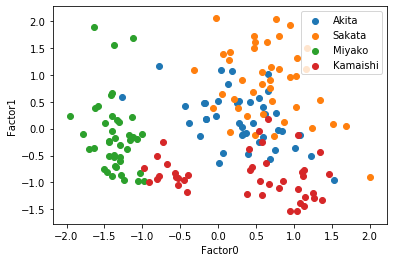

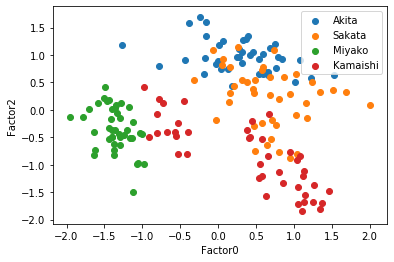

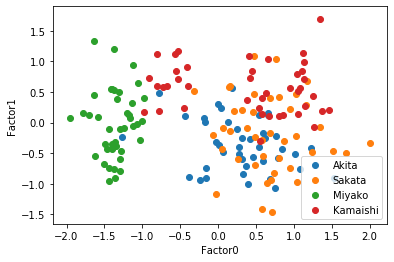

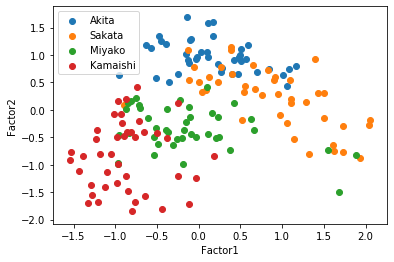

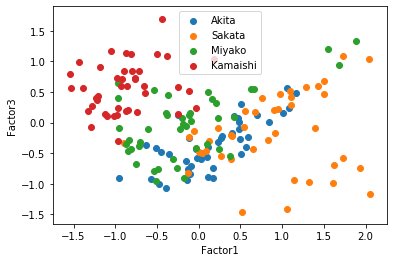

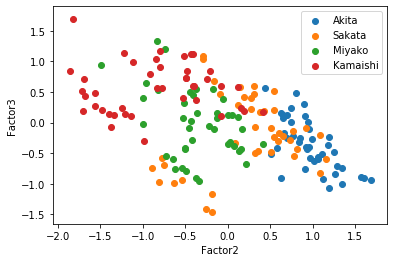

In [9]:
# 因子分析の結果を使って，
# 観測された元々の説明変数の値を潜在変数の値に変換する
factors_df = pd.DataFrame(fa_model.transform(df_sea_side_city.iloc[:, 2:]))
num_of_row = df_sea_side_city.values.shape[0]

# 潜在変数の値をプロットしてみる
# 日本海側と太平洋側にわけて
akita = list([])
miyako = list([])
sakata = list([])
kamaishi = list([])
for i in range(num_of_row):
  if df_sea_side_city.values[i][0] == 'Akita':
    akita.append(factors_df.iloc[i, :])
  elif df_sea_side_city.values[i][0] == 'Miyako':
    miyako.append(factors_df.iloc[i, :])
  elif df_sea_side_city.values[i][0] == 'Sakata':
    sakata.append(factors_df.iloc[i, :])
  else:
    kamaishi.append(factors_df.iloc[i, :])

df_akita = pd.DataFrame(akita)
df_miyako = pd.DataFrame(miyako)
df_sakata = pd.DataFrame(sakata)
df_kamaishi = pd.DataFrame(kamaishi)

import matplotlib.pyplot as plt

plt.scatter(df_akita.iloc[:, 0], df_akita.iloc[:, 1], label='Akita')
plt.scatter(df_sakata.iloc[:, 0], df_sakata.iloc[:, 1], label='Sakata')
plt.scatter(df_miyako.iloc[:, 0], df_miyako.iloc[:, 1], label='Miyako')
plt.scatter(df_kamaishi.iloc[:, 0], df_kamaishi.iloc[:, 1], label='Kamaishi')

plt.xlabel('Factor0')
plt.ylabel('Factor1')
plt.legend()
plt.show()

plt.scatter(df_akita.iloc[:, 0], df_akita.iloc[:, 2], label='Akita')
plt.scatter(df_sakata.iloc[:, 0], df_sakata.iloc[:, 2], label='Sakata')
plt.scatter(df_miyako.iloc[:, 0], df_miyako.iloc[:, 2], label='Miyako')
plt.scatter(df_kamaishi.iloc[:, 0], df_kamaishi.iloc[:, 2], label='Kamaishi')

plt.xlabel('Factor0')
plt.ylabel('Factor2')
plt.legend()
plt.show()

plt.scatter(df_akita.iloc[:, 0], df_akita.iloc[:, 3], label='Akita')
plt.scatter(df_sakata.iloc[:, 0], df_sakata.iloc[:, 3], label='Sakata')
plt.scatter(df_miyako.iloc[:, 0], df_miyako.iloc[:, 3], label='Miyako')
plt.scatter(df_kamaishi.iloc[:, 0], df_kamaishi.iloc[:, 3], label='Kamaishi')

plt.xlabel('Factor0')
plt.ylabel('Factor1')
plt.legend()
plt.show()

plt.scatter(df_akita.iloc[:, 1], df_akita.iloc[:, 2], label='Akita')
plt.scatter(df_sakata.iloc[:, 1], df_sakata.iloc[:, 2], label='Sakata')
plt.scatter(df_miyako.iloc[:, 1], df_miyako.iloc[:, 2], label='Miyako')
plt.scatter(df_kamaishi.iloc[:, 1], df_kamaishi.iloc[:, 2], label='Kamaishi')

plt.xlabel('Factor1')
plt.ylabel('Factor2')
plt.legend()
plt.show()

plt.scatter(df_akita.iloc[:, 1], df_akita.iloc[:, 3], label='Akita')
plt.scatter(df_sakata.iloc[:, 1], df_sakata.iloc[:, 3], label='Sakata')
plt.scatter(df_miyako.iloc[:, 1], df_miyako.iloc[:, 3], label='Miyako')
plt.scatter(df_kamaishi.iloc[:, 1], df_kamaishi.iloc[:, 3], label='Kamaishi')

plt.xlabel('Factor1')
plt.ylabel('Factor3')
plt.legend()
plt.show()

plt.scatter(df_akita.iloc[:, 2], df_akita.iloc[:, 3], label='Akita')
plt.scatter(df_sakata.iloc[:, 2], df_sakata.iloc[:, 3], label='Sakata')
plt.scatter(df_miyako.iloc[:, 2], df_miyako.iloc[:, 3], label='Miyako')
plt.scatter(df_kamaishi.iloc[:, 2], df_kamaishi.iloc[:, 3], label='Kamaishi')

plt.xlabel('Factor2')
plt.ylabel('Factor3')
plt.legend()
plt.show()

この散布図を見ると，因子1-2の散布図，因子1-3の両方で太平洋側と日本海側を直線で分けられるように見える，因子負荷量を考えると，もっと因子数が少ない方がいいかもしれない．そこで因子数3と2についてもまったく同じように行っていく．


In [11]:
# 因子数3
n_factors=3

fa_model = FactorAnalyzer(n_factors=n_factors, method='ml', rotation='varimax', impute='drop')
fa_model.fit(df_sea_side_city.iloc[:, 2:])

# わかりやすく列名を，元のデータフレームから持ってきて挿入する
# 0列目はラベルなので，1列目から
columns_name_array = df_sea_side_city.columns[2:]
# 行名(index)として，この配列を用いて，DataFrameを作る
df_result = pd.DataFrame(fa_model.loadings_, index=columns_name_array)

# 因子負荷量の行列を色分けして表示
cm = sns.light_palette('red', as_cmap=True)
# セルの最後に実行すること．df.head()と同じく，printしても色分けされない
df_result.style.background_gradient(cmap=cm)

,0,1,2
1月の降水量,0.331274,0.919507,0.199412
1月の日照時間,-0.596228,-0.524132,-0.442475
1月の平均風速,0.948658,0.247202,0.184228
1月の平均湿度,0.61996,0.258894,0.189044
１月の平均雲量,0.225407,0.191969,0.923122


日照時間の因子負荷量の因子間の違いが，非常に小さい．これは3因子では因子分析がうまくいかなかったことを示している．


In [12]:
# Varimax回転の時の因子数3での累積寄与率
factor_index = list([])
for i in range(n_factors):
  factor_index.append('因子' + str(i))
df_cumulative_variance = pd.DataFrame(fa_model.get_factor_variance()[2], index=factor_index)
df_cumulative_variance.style.background_gradient(cmap=cm)

,0
因子0,0.360068
因子1,0.617107
因子2,0.848583


3因子の累積寄与率が84.9%なので，因子数3で因子分析を行った方が，全体をうまく説明できていることになる．が，因子負荷量を合わせて考えると，あまりよくない．

In [14]:
# 因子数2
n_factors=2

fa_model = FactorAnalyzer(n_factors=n_factors, method='ml', rotation='varimax', impute='drop')
fa_model.fit(df_sea_side_city.iloc[:, 2:])

# わかりやすく列名を，元のデータフレームから持ってきて挿入する
# 0列目はラベルなので，1列目から
columns_name_array = df_sea_side_city.columns[2:]
# 行名(index)として，この配列を用いて，DataFrameを作る
df_result = pd.DataFrame(fa_model.loadings_, index=columns_name_array)

# 因子負荷量の行列を色分けして表示
cm = sns.light_palette('red', as_cmap=True)
# セルの最後に実行すること．df.head()と同じく，printしても色分けされない
df_result.style.background_gradient(cmap=cm)

,0,1
1月の降水量,0.687359,0.346883
1月の日照時間,-0.870686,-0.486737
1月の平均風速,0.375503,0.924121
1月の平均湿度,0.32651,0.610733
１月の平均雲量,0.617729,0.216


  因子数2の時，因子負荷量が因子間でそれなりに大きく離れている．
  
  降水量，日照時間，雲量は因子0に，風速と湿度は因子1にそれぞれ大きな影響を受けている．
  
  因子数を3以下にする場合因子数2が適切っぽい．確かめるために散布図を描いてみる．
  

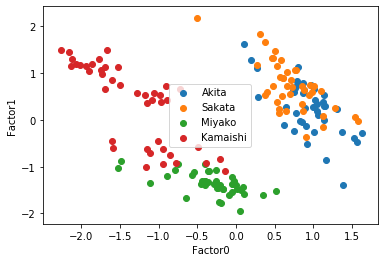

In [15]:
# 因子分析の結果を使って，
# 観測された元々の説明変数の値を潜在変数の値に変換する
factors_df = pd.DataFrame(fa_model.transform(df_sea_side_city.iloc[:, 2:]))
num_of_row = df_sea_side_city.values.shape[0]

# 潜在変数の値をプロットしてみる
akita = list([])
miyako = list([])
sakata = list([])
kamaishi = list([])
for i in range(num_of_row):
  if df_sea_side_city.values[i][0] == 'Akita':
    akita.append(factors_df.iloc[i, :])
  elif df_sea_side_city.values[i][0] == 'Miyako':
    miyako.append(factors_df.iloc[i, :])
  elif df_sea_side_city.values[i][0] == 'Sakata':
    sakata.append(factors_df.iloc[i, :])
  else:
    kamaishi.append(factors_df.iloc[i, :])

df_akita = pd.DataFrame(akita)
df_miyako = pd.DataFrame(miyako)
df_sakata = pd.DataFrame(sakata)
df_kamaishi = pd.DataFrame(kamaishi)

import matplotlib.pyplot as plt

plt.scatter(df_akita.iloc[:, 0], df_akita.iloc[:, 1], label='Akita')
plt.scatter(df_sakata.iloc[:, 0], df_sakata.iloc[:, 1], label='Sakata')
plt.scatter(df_miyako.iloc[:, 0], df_miyako.iloc[:, 1], label='Miyako')
plt.scatter(df_kamaishi.iloc[:, 0], df_kamaishi.iloc[:, 1], label='Kamaishi')

plt.xlabel('Factor0')
plt.ylabel('Factor1')
plt.legend()
plt.show()


因子数2だと日本海側と太平洋側で直線分離できるので，とりあえずこれで因子に名前を付けることにする．
 
因子1は平均風速と湿度に正の大きな影響与えている．これは「荒天度」ということができるだろう．
 
では「降水量」「日照時間」「雲量」に影響を大きく与えている因子0にはどのような名前をつければよいだろうか．日照時間は負の影響であることに注目して名前を付けてみよう．
 